# Convolutional Neural Network (CNN) for CIFAR10 Classification

In this notebook, we will build a deep learning Convolutional Neural Network (CNN) model to classify images of the CIFAR10 dataset, a commonly used dataset in computer vision. Your task is to complete each code cell by filling in the appropriate portion of the code. Each cell contains a partial code snippet, and your goal is to provide the missing code to set up the pipeline.

### Import packages for the notebook

In this step, we import the necessary packages for our task. The essential packages used in this notebook are:

- numpy as np: NumPy is a fundamental package for scientific computing in Python. We use it for numerical operations and array manipulations.
- torch: This is the PyTorch library, which is a popular deep learning framework for building and training neural networks.
- torch.nn: This module contains all the necessary functions and classes for building neural networks in PyTorch.
- torch.optim: This module contains various optimization algorithms used for training neural networks.
- torch.utils.data.DataLoader: This class is used to load data efficiently for training and validation.
- torchvision.transforms: This module provides common image transformations like resizing, cropping, and normalization.

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

### Define a transformation

You may add your prefered choices from trasform. library or leave it as it is.

In [2]:
# Data transformation defined
transform = transforms.Compose([
    # you may add more transformations here...
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1]
])

### Load the CIFAR-10 dataset
In the following code snippet, you'll see the initial setup for loading the CIFAR-10 dataset. Your task is setting up the data transformation, splitting the dataset into training and validation sets, and creating data loaders:

- Calculate the size for the training set and validation set with len()
- Split the training dataset into train and validation sets using random_split from torch.utils.data
- Create data loaders for the training, validation, and test sets using DataLoader from torch.utils.data

In [3]:
# Load the CIFAR-10 dataset
# Solution
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

# Load the dataset
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

100%|██████████| 170498071/170498071 [00:04<00:00, 37471065.23it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Plot the dataloader data
Now the train_loader, val_loader, and test_loader are ready to be used for training and evaluation.

Lets plot some images: its a good practice to view the data before using it as input to the model.



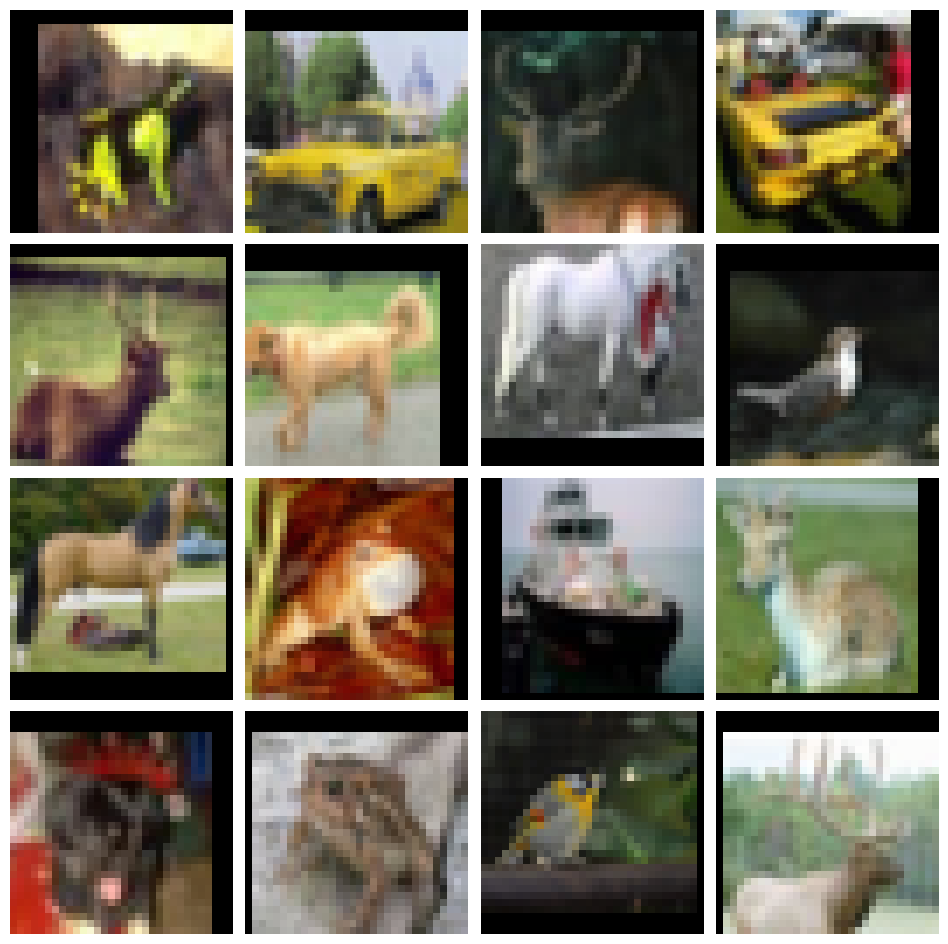

In [25]:
def plot_batch_images(data_loader, grid_size=(5, 5)):
    # Get a random batch of data
    batch_images, _ = next(iter(data_loader))

    # Denormalize the images
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    denormalized_images = batch_images.cpu().numpy() * std[:, None, None] + mean[:, None, None]
    denormalized_images = np.clip(denormalized_images, 0, 1)  # Clip values to [0, 1]

    # Create a grid of images
    num_rows, num_cols = grid_size
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

    for i in range(num_rows):
        for j in range(num_cols):
            image = denormalized_images[i * num_cols + j].transpose(1, 2, 0)
            axes[i, j].imshow(image)
            axes[i, j].axis('off')

    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.show()

# Call the function to plot random images from the train_loader in a 5x5 grid
plot_batch_images(train_loader, (4,4))

Below, you'll find the initial code to define the neural network model. Your task is to complete the Net class by adding the missing layers and connections as described in the comments. You'll be implementing a simple convolutional neural network (CNN) architecture.

Your Task:
Fill in the missing portions of the code in the cell below to complete the neural network model definition.

In [6]:
import torch.nn as nn
# Solution
# Define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 128 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net()

#### Define optimizer and loss function
Below, you'll find a code snippet to define the optimizer and loss function. Your task is to complete the code by filling in the appropriate optimizer and loss function classes along with the required hyperparameters.

#### Your Task:
Fill in the missing portions of the code in the cell below to set up the optimizer and loss function.

In [7]:
import torch.optim as optim
# Solution

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


### Train the model
Below, you'll find a code snippet with placeholders for the training and validation loops. Your task is to complete the code by filling in the missing portions to implement the training and validation process.

#### Your Task:
Fill in the missing portions of the code in the cell below to complete the training and validation loops.

In [8]:
import torch
# Solution
# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    model.eval()
    val_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            val_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    val_loss /= len(val_loader.dataset)
    print(f'Epoch {epoch+1}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {correct/len(val_loader.dataset):.4f}')



Epoch 1, Validation Loss: 0.0641, Validation Accuracy: 0.6352
Epoch 2, Validation Loss: 0.0555, Validation Accuracy: 0.6897
Epoch 3, Validation Loss: 0.0522, Validation Accuracy: 0.7093
Epoch 4, Validation Loss: 0.0547, Validation Accuracy: 0.7019
Epoch 5, Validation Loss: 0.0577, Validation Accuracy: 0.7077


### Test the model
Below, you'll find a code snippet to test the trained model on the test set. Your task is to complete the code by filling in the missing portions to calculate and print the test loss and accuracy.

#### Your Task:
Fill in the missing portions of the code in the cell below to complete the testing process.

In [9]:
# Test the model
# Solution
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {correct/len(test_loader.dataset):.4f}')


Test Loss: 0.0580, Test Accuracy: 0.7079


Below, you'll find a code snippet to redefine the data transformations and adjust the batch size. Your task is to complete the code by replacing the existing transformation setup with the enhanced transformations and updating the batch size.

#### Your Task:
Replace the existing data transformation setup with the provided enhanced transformations and adjust the batch size to complete the code in the cell below.

In [10]:
# Solution
# Import the CIFAR dataset
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Load the dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform_train, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform_test, download=True)

# Split into training and validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Adjust the batch size
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)



Files already downloaded and verified
Files already downloaded and verified


Below, you'll find a code snippet to load the pretrained ResNet-18 model and set up the training components. Your task is to complete the code by adding the missing parts to define the optimizer, loss function, and modify the fully connected layer for 10 classes.

#### Your Task:
Complete the code in the cell below by defining the optimizer and loss function, as well as modifying the fully connected layer of the pretrained ResNet-18 model to match the 10 classes of the CIFAR-10 dataset.

In [11]:
import torchvision.models as models
# Solution
# Load the pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 10)  # Change the fully connected layer for 10 classes

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 148MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Here we'll enhance the training process by incorporating logging of training and validation metrics. Additionally, we'll integrate the tqdm library to provide a progress bar that gives feedback on the training process. Additionally, we will create informative plots that illustrate the model's performance during training.

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Define lists to store metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Define the number of epochs
num_epochs = 15

for epoch in range(num_epochs):
    model.train()
    train_loss_total = 0
    train_correct = 0
    train_total = 0

    for batch_idx, (data, target) in enumerate(tqdm(train_loader)):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss_total += loss.item()

        _, predicted = output.max(1)
        train_total += target.size(0)
        train_correct += predicted.eq(target).sum().item()

    train_accuracy = train_correct / train_total
    train_loss_avg = train_loss_total / len(train_loader)

    model.eval()
    val_loss_total = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for data, target in tqdm(val_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            val_loss_total += loss.item()

            _, predicted = output.max(1)
            val_total += target.size(0)
            val_correct += predicted.eq(target).sum().item()

    val_accuracy = val_correct / val_total
    val_loss_avg = val_loss_total / len(val_loader)

    # Append metrics to lists
    train_losses.append(train_loss_avg)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss_avg)
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch+1}, Train Loss: {train_loss_avg:.4f}, Train Accuracy: {train_accuracy:.4f}, Validation Loss: {val_loss_avg:.4f}, Validation Accuracy: {val_accuracy:.4f}')

100%|██████████| 79/79 [00:04<00:00, 17.23it/s]


Epoch 1, Train Loss: 0.4704, Train Accuracy: 0.8376, Validation Loss: 0.6562, Validation Accuracy: 0.7812


100%|██████████| 79/79 [00:05<00:00, 15.60it/s]


Epoch 2, Train Loss: 0.4832, Train Accuracy: 0.8354, Validation Loss: 0.7863, Validation Accuracy: 0.7389


100%|██████████| 79/79 [00:04<00:00, 16.58it/s]


Epoch 3, Train Loss: 0.4823, Train Accuracy: 0.8345, Validation Loss: 0.5882, Validation Accuracy: 0.7981


100%|██████████| 79/79 [00:04<00:00, 16.65it/s]


Epoch 4, Train Loss: 0.4341, Train Accuracy: 0.8512, Validation Loss: 0.5488, Validation Accuracy: 0.8150


100%|██████████| 79/79 [00:05<00:00, 15.11it/s]


Epoch 5, Train Loss: 0.4053, Train Accuracy: 0.8603, Validation Loss: 0.5461, Validation Accuracy: 0.8139


100%|██████████| 79/79 [00:04<00:00, 16.93it/s]


Epoch 6, Train Loss: 0.3884, Train Accuracy: 0.8658, Validation Loss: 0.5378, Validation Accuracy: 0.8211


100%|██████████| 79/79 [00:04<00:00, 16.18it/s]


Epoch 7, Train Loss: 0.3755, Train Accuracy: 0.8702, Validation Loss: 0.5263, Validation Accuracy: 0.8205


100%|██████████| 79/79 [00:04<00:00, 16.66it/s]


Epoch 8, Train Loss: 0.3664, Train Accuracy: 0.8723, Validation Loss: 0.5418, Validation Accuracy: 0.8230


100%|██████████| 79/79 [00:05<00:00, 14.91it/s]


Epoch 9, Train Loss: 0.3489, Train Accuracy: 0.8787, Validation Loss: 0.5032, Validation Accuracy: 0.8329


100%|██████████| 79/79 [00:04<00:00, 16.83it/s]


Epoch 10, Train Loss: 0.3458, Train Accuracy: 0.8812, Validation Loss: 0.5275, Validation Accuracy: 0.8265


100%|██████████| 79/79 [00:06<00:00, 12.29it/s]


Epoch 11, Train Loss: 0.3484, Train Accuracy: 0.8813, Validation Loss: 0.5433, Validation Accuracy: 0.8231


100%|██████████| 79/79 [00:05<00:00, 14.80it/s]


Epoch 12, Train Loss: 0.3197, Train Accuracy: 0.8877, Validation Loss: 0.5114, Validation Accuracy: 0.8311


100%|██████████| 79/79 [00:05<00:00, 15.74it/s]


Epoch 13, Train Loss: 0.3434, Train Accuracy: 0.8834, Validation Loss: 0.5942, Validation Accuracy: 0.8058


100%|██████████| 79/79 [00:04<00:00, 16.39it/s]


Epoch 14, Train Loss: 0.3455, Train Accuracy: 0.8802, Validation Loss: 0.5258, Validation Accuracy: 0.8309


100%|██████████| 79/79 [00:05<00:00, 14.19it/s]

Epoch 15, Train Loss: 0.2992, Train Accuracy: 0.8955, Validation Loss: 0.5170, Validation Accuracy: 0.8342


Here's how we can to plot the metrics stored before:

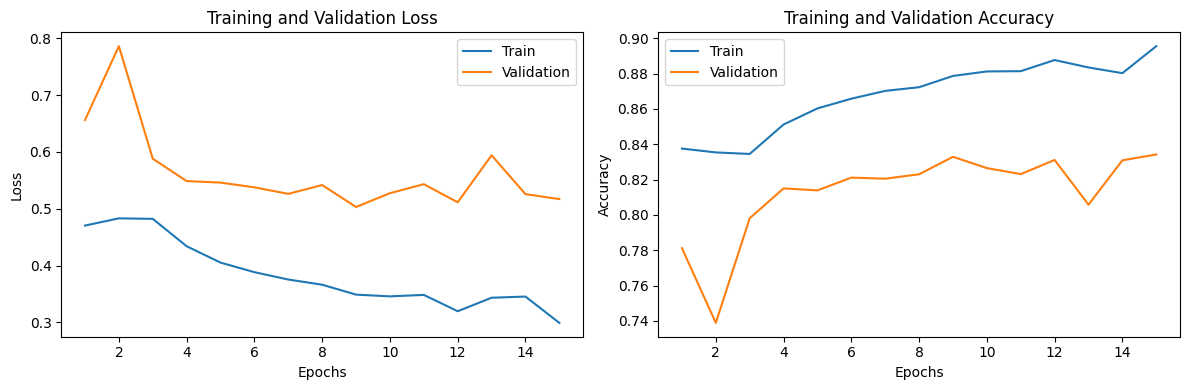

In [21]:
def plot_loss_and_accuracy(epochs_range, train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure(figsize=(12, 4))

    # Plotting loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Train')
    plt.plot(epochs_range, val_losses, label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Plotting accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label='Train')
    plt.plot(epochs_range, val_accuracies, label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Usage
plot_loss_and_accuracy(epochs_range, train_losses, val_losses, train_accuracies, val_accuracies)


Here we'll enhance the previous test process by integrating the tqdm library to provide a progress bar that gives feedback on the testing process.

In [15]:
# Test the model
model.eval()
test_loss_total = 0
test_correct = 0
test_total = 0

with torch.no_grad():
    for data, target in tqdm(test_loader):
        data, target = data.to(device), target.to(device)
        output = model(data)
        loss = criterion(output, target)
        test_loss_total += loss.item()

        _, predicted = output.max(1)
        test_total += target.size(0)
        test_correct += predicted.eq(target).sum().item()

test_accuracy = test_correct / test_total
test_loss_avg = test_loss_total / len(test_loader)

print(f'Test Loss: {test_loss_avg:.4f}, Test Accuracy: {test_accuracy:.4f}')


100%|██████████| 79/79 [00:03<00:00, 22.52it/s]

Test Loss: 0.4770, Test Accuracy: 0.8500


### Save your trained model

Here's how you can save and load the trained model using PyTorch's torch.save() and torch.load() functions:

Saving the Model:

In [16]:
# Save the trained model
torch.save(model.state_dict(), 'model.pth')


To load the model later:



In [18]:
# Load the saved model
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 10)  # Change the fully connected layer for 10 classes

model.load_state_dict(torch.load('model.pth'))


<All keys matched successfully>

### Going the Extra Mile: Fine-Tuning a Pretrained Model

In this advanced exercise, you'll take your training process to the next level by performing fine-tuning on a pre-trained model. Fine-tuning involves adjusting the weights of the pre-trained model to better fit the specific dataset you're working with. This approach can lead to improved performance on your target task.

Below, you'll find a code snippet that demonstrates the process of fine-tuning a pre-trained model on the CIFAR-10 dataset. Your task is to run this code to fine-tune the model and observe any improvements in training and validation metrics.

#### Your Task:
Copy and paste the training and test code snippets above into a new cell in your notebook. This code snippet should perform fine-tuning on your pre-trained model and include additional training and validation loops. Your task is to run this code and observe the impact of fine-tuning on the model's performance.

First we freeze the last 6 layers

In [19]:
# Freeze all layers except the last 6 layers
for param in model.parameters():
    param.requires_grad = False

for param in model.layer4.parameters():
    param.requires_grad = True


Then we use a smaller learning rate

In [ ]:
# Define optimizer and loss function
optimizer = optim.SGD(model.parameters(), lr=0.00001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

Now we train again

100%|██████████| 79/79 [00:05<00:00, 15.08it/s]


Epoch 1, Train Loss: 0.2638, Train Accuracy: 0.9077, Validation Loss: 0.4890, Validation Accuracy: 0.8385


100%|██████████| 79/79 [00:04<00:00, 16.85it/s]


Epoch 2, Train Loss: 0.2678, Train Accuracy: 0.9070, Validation Loss: 0.4939, Validation Accuracy: 0.8347


100%|██████████| 79/79 [00:04<00:00, 16.78it/s]


Epoch 3, Train Loss: 0.2669, Train Accuracy: 0.9083, Validation Loss: 0.5022, Validation Accuracy: 0.8365


100%|██████████| 79/79 [00:04<00:00, 16.73it/s]


Epoch 4, Train Loss: 0.2647, Train Accuracy: 0.9088, Validation Loss: 0.4875, Validation Accuracy: 0.8400


100%|██████████| 79/79 [00:04<00:00, 16.73it/s]


Epoch 5, Train Loss: 0.2678, Train Accuracy: 0.9082, Validation Loss: 0.4940, Validation Accuracy: 0.8369


100%|██████████| 79/79 [00:05<00:00, 15.05it/s]


Epoch 6, Train Loss: 0.2675, Train Accuracy: 0.9074, Validation Loss: 0.4924, Validation Accuracy: 0.8382


100%|██████████| 79/79 [00:05<00:00, 14.60it/s]


Epoch 7, Train Loss: 0.2635, Train Accuracy: 0.9078, Validation Loss: 0.5008, Validation Accuracy: 0.8418


100%|██████████| 79/79 [00:05<00:00, 14.49it/s]


Epoch 8, Train Loss: 0.2632, Train Accuracy: 0.9087, Validation Loss: 0.4921, Validation Accuracy: 0.8422


100%|██████████| 79/79 [00:05<00:00, 14.94it/s]


Epoch 9, Train Loss: 0.2682, Train Accuracy: 0.9059, Validation Loss: 0.4962, Validation Accuracy: 0.8360


100%|██████████| 79/79 [00:04<00:00, 16.78it/s]


Epoch 10, Train Loss: 0.2583, Train Accuracy: 0.9106, Validation Loss: 0.4856, Validation Accuracy: 0.8423


100%|██████████| 79/79 [00:05<00:00, 13.34it/s]


Epoch 11, Train Loss: 0.2624, Train Accuracy: 0.9095, Validation Loss: 0.4997, Validation Accuracy: 0.8382


100%|██████████| 79/79 [00:04<00:00, 16.75it/s]


Epoch 12, Train Loss: 0.2618, Train Accuracy: 0.9106, Validation Loss: 0.4892, Validation Accuracy: 0.8407


100%|██████████| 79/79 [00:05<00:00, 14.66it/s]


Epoch 13, Train Loss: 0.2647, Train Accuracy: 0.9082, Validation Loss: 0.4894, Validation Accuracy: 0.8353


100%|██████████| 79/79 [00:10<00:00,  7.40it/s]


Epoch 14, Train Loss: 0.2625, Train Accuracy: 0.9086, Validation Loss: 0.5063, Validation Accuracy: 0.8346


100%|██████████| 79/79 [00:05<00:00, 14.62it/s]


Epoch 15, Train Loss: 0.2636, Train Accuracy: 0.9081, Validation Loss: 0.4981, Validation Accuracy: 0.8412


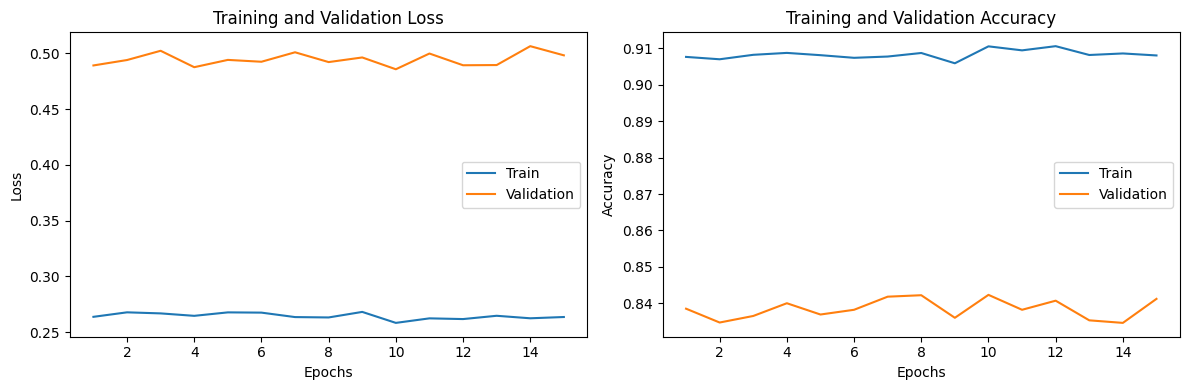

100%|██████████| 79/79 [00:03<00:00, 20.66it/s]

Test Loss: 0.4567, Test Accuracy: 0.8532


In [22]:
# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define lists to store metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Define the number of epochs
num_epochs = 15

for epoch in range(num_epochs):
    model.train()
    train_loss_total = 0
    train_correct = 0
    train_total = 0

    for batch_idx, (data, target) in enumerate(tqdm(train_loader)):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss_total += loss.item()

        _, predicted = output.max(1)
        train_total += target.size(0)
        train_correct += predicted.eq(target).sum().item()

    train_accuracy = train_correct / train_total
    train_loss_avg = train_loss_total / len(train_loader)

    model.eval()
    val_loss_total = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for data, target in tqdm(val_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            val_loss_total += loss.item()

            _, predicted = output.max(1)
            val_total += target.size(0)
            val_correct += predicted.eq(target).sum().item()

    val_accuracy = val_correct / val_total
    val_loss_avg = val_loss_total / len(val_loader)

    # Append metrics to lists
    train_losses.append(train_loss_avg)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss_avg)
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch+1}, Train Loss: {train_loss_avg:.4f}, Train Accuracy: {train_accuracy:.4f}, Validation Loss: {val_loss_avg:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# Usage
plot_loss_and_accuracy(epochs_range, train_losses, val_losses, train_accuracies, val_accuracies)

# Test the model
model.eval()
test_loss_total = 0
test_correct = 0
test_total = 0

with torch.no_grad():
    for data, target in tqdm(test_loader):
        data, target = data.to(device), target.to(device)
        output = model(data)
        loss = criterion(output, target)
        test_loss_total += loss.item()

        _, predicted = output.max(1)
        test_total += target.size(0)
        test_correct += predicted.eq(target).sum().item()

test_accuracy = test_correct / test_total
test_loss_avg = test_loss_total / len(test_loader)

print(f'Test Loss: {test_loss_avg:.4f}, Test Accuracy: {test_accuracy:.4f}')


In this comprehensive exercise, you've worked through a complete deep learning workflow using the CIFAR-10 dataset. You've covered data preprocessing, model definition, training, validation, testing, and advanced techniques like fine-tuning and visualizing performance metrics. This exercise aimed to provide you with a hands-on experience in building and training neural networks using PyTorch.